<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

## Problem Statement



# Samsung Internal SSD Reviews prediction

Rating predictions using reviews written by users can be a useful problem statement in E-commerce domain and can be used for recommending similar products that may interest users. The dataset in this problem statement comprises reviews pertaining to Samsung Internal SSD product specifically SAMSUNG 850 EVO 2.5" 250GB SATA III 3D NAND Internal Solid State Drive (SSD) MZ-75E250B/AM from the NewEgg Store website.  We will build a Natural Language processing model using Glove embeddings which is trained on reviews given by customers that have used the product and try to predict ratings given a new rating.




### Objective:
Given the reviews provided by customers, can you train a model that accurately predicts the corresponding rating of a review?

### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

- review_title : The Title for the customer review

- overall_review: The whole customer review details

- pros: The customer opinion about the good things in this product

- cons: The customer opinion about the bad things in this product

- ownership_pariod: How long the customer owned this product

- date: When the review was written

- rating_stars: The product rating from 1 to 5

- year: In which year the review was written

- month: In which month the review was written

- day: In which day the review was written

## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and Preparation

5. Model Building

6. Conclusion and Interpretation

7. Food for thought

## 1. Import Libraries

Let us start by mounting the drive

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Let us check for the version of installed tensorflow.

In [2]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.4.1


## 2. Setting Options

In [3]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### Read the dataset and check top 5 rows

In [4]:
d=pd.read_csv('ssd_reviews.csv')
d.head(5)

,Unnamed: 0,review_title,overall_review,pros,cons,ownership_pariod,date,rating_stars,year,month,day
0,0,solid,buy it you will not regret this purchase,reliable fast silent cool running drive highly...,NaN,years,2019-12-05 12:58:58,5,2019,12,5
1,1,nice drive for price even cheaper by todays costs,good drive price,been running almost constantly since when i pu...,NaN,years,2019-11-01 08:25:45,5,2019,11,1
2,2,perfect,used this drive as my boot drive and only data...,good value decently fast good longevity,none so far,years,2019-10-27 17:05:49,5,2019,10,27
3,3,very snappy,os boots quicker os menus pop up quicker gamin...,noticeable improvement in os performance over ...,samsung magician software causes some games to...,years,2019-10-24 18:29:43,5,2019,10,24
4,4,worth the hype,this was the sdd that everyone said to get and...,NaN,NaN,years,2019-09-11 19:21:03,5,2019,9,11


### Check info of the dataset and write your findings

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        2227 non-null   int64 
 1   review_title      2131 non-null   object
 2   overall_review    1448 non-null   object
 3   pros              2205 non-null   object
 4   cons              2216 non-null   object
 5   ownership_pariod  2159 non-null   object
 6   date              2227 non-null   object
 7   rating_stars      2227 non-null   int64 
 8   year              2227 non-null   int64 
 9   month             2227 non-null   int64 
 10  day               2227 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 191.5+ KB


review_title, 'overall_review', 'pros', 'cons','ownership_pariod' have null values

## 4.  Data Analysis and Preparation

### 4.1 Checking missing values
#### Check for missing values (along with the percentage of null values)

In [6]:
d.isnull().sum()

Unnamed: 0            0
review_title         96
overall_review      779
pros                 22
cons                 11
ownership_pariod     68
date                  0
rating_stars          0
year                  0
month                 0
day                   0
dtype: int64

In [7]:
d.isnull().sum()*100/len(d)

Unnamed: 0          0.0000000
review_title        4.3107319
overall_review     34.9797934
pros                0.9878761
cons                0.4939380
ownership_pariod    3.0534351
date                0.0000000
rating_stars        0.0000000
year                0.0000000
month               0.0000000
day                 0.0000000
dtype: float64

### 4.2 Analyzing the target column (Rating_stars)

#### Check the value counts of 'rating_stars' and write your comments

In [8]:
d['rating_stars'].value_counts()

5    1756
4     181
1     153
3      77
2      60
Name: rating_stars, dtype: int64

dataset is skewed

### 4.3 Let's analyze other features like year, month, and day etc.
#### Check value counts of 'year' and write your observations., Comment on the range of years, frequency of ratings in each year.

In [9]:
d['year'].value_counts()

2015    1006
2016     605
2017     370
2018     187
2019      46
2014      13
Name: year, dtype: int64

distribution of ratings across years is skewed. range of years is 5

#### Check mean rating for each year and write your findings

In [10]:
d.groupby(by='year').mean()['rating_stars']

year
2014   4.9230769
2015   4.4582505
2016   4.5900826
2017   4.5108108
2018   4.3475936
2019   4.3478261
Name: rating_stars, dtype: float64

mean of ratings seems to be almost same across years

#### Check value counts of 'month' and write your observations. Comment on the frequency of ratings and discuss if the rating count and mean rating is higher/low on certain months.

In [11]:
d['month'].value_counts()

12    278
2     239
3     234
1     221
4     205
11    191
5     158
9     157
7     144
10    141
6     140
8     119
Name: month, dtype: int64

number of ratings across months seems to be unevenly distributed. rating count is higher for certain months and lower for certain months.

In [12]:
d.groupby('month').mean()['rating_stars']

month
1    4.6425339
2    4.4058577
3    4.6111111
4    4.4195122
5    4.4493671
6    4.5571429
7    4.7638889
8    4.4789916
9    4.5414013
10   4.3049645
11   4.4607330
12   4.3597122
Name: rating_stars, dtype: float64

mean rating is higher for certain months and lower for certain months

### 4.4 Combine text features
#### Drop all the numerical features ['Unnamed: 0','date', 'year', 'month', 'day', 'ownership_pariod'] and ['rating_stars']

In [13]:
df=d.drop(['Unnamed: 0','date', 'year', 'month', 'day', 'ownership_pariod','rating_stars'],axis=1)
df

,review_title,overall_review,pros,cons
0,solid,buy it you will not regret this purchase,reliable fast silent cool running drive highly...,NaN
1,nice drive for price even cheaper by todays costs,good drive price,been running almost constantly since when i pu...,NaN
2,perfect,used this drive as my boot drive and only data...,good value decently fast good longevity,none so far
3,very snappy,os boots quicker os menus pop up quicker gamin...,noticeable improvement in os performance over ...,samsung magician software causes some games to...
4,worth the hype,this was the sdd that everyone said to get and...,NaN,NaN
5,good price,dont be shy about this buy,fast and easy install great price,non
6,ssd strong,NaN,its still working,its a little on the expensive side hoping the ...
7,it died,used this as a storage drive for steam games only,it was a fast drivesamsung warranty honored,it died in 3 years
8,ssd s are meh,i ve been using samsung electronics for years ...,lightning fast and reliable,ordered two and only one works
9,good ssd for sata,i bought this for to replace a wd 1 5tb black ...,runs at 30 degrees c so nice and coolquiet lik...,a little slow for some reason see other section


#### Replace null values (NaN) with blanks

In [14]:
df=df.fillna('')

#### Join all text items in a row that have a space in between and Add a new column (with the newly created combined reviews) to the dataframe.

In [15]:
df['r']=df['review_title']+' '+df['overall_review']+' '+df['pros']+' '+df['cons']

#### Check if there are any null values and drop NaN values if any

In [16]:
df.isnull().sum()

review_title      0
overall_review    0
pros              0
cons              0
r                 0
dtype: int64

#### Calculate the length of each review and add it to the dataframe

In [17]:
df['l']=[len(i.split(' ')) for i in df['r']]

#### Check summary stats of the length column

In [18]:
df.describe()

,l
count,2227.0000000
mean,84.8675348
std,87.4983350
min,4.0000000
25%,30.0000000
50%,59.0000000
75%,109.0000000
max,1615.0000000


### 4.5 Analyzing and preparing the text data


#### Set the max length of each review to 25 since it results in faster training (however, you are free to change this)
#### Set max_features to 10000 and embedding size to 50

In [19]:
max_features = 10000
maxlen = 25
embedding_size = 50

#### Tokenize the cobined text data. You can use the Tokenizer from tensorflow.keras.preprocessing.text. Check the number of samples post tokenization.

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
t=Tokenizer(num_words=max_features)
t.fit_on_texts(list(df['r']))
x=t.texts_to_sequences(df['r'])

#### Pad the above tokenized reviews data save it as independent features. Use max_len for the same.

In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
x=pad_sequences(x,maxlen=maxlen)

#### Check the shape of X (padded tokenized review data) and y (rating_stars) data.

In [26]:
x.shape

(2227, 25)

In [27]:
y=d['rating_stars']
y.shape

(2227,)

#### Check the total number of words in the dictionary (of tekenizer)

In [45]:
len(t.word_counts)+1

8839

### 4.6 Compute the glove embeddings. Use the provided txt file for the same.

#### Read the glove embeddings from the file provided titled ‘glove.6B.50d.txt’. And save it to a dictotionary having word and corresponding embedding vector.

In [32]:
e={}
with open('glove.6B.50d.txt','r',encoding='utf8') as f:
    for l in f:
        v=l.split()
        w=v[0]
        v=np.asarray(v[1:],'float32')
        e[w]=v

#### Create a weight matrix for words in the training docs

In [38]:
em=np.zeros((len(t.word_index)+1,50))
for w,i in t.word_index.items():
    ev=e.get(w)
    if ev is not None:
        em[i]=ev

#### Check length of the embedding

In [47]:
len(e.values())

400000

### 4.7 Target Feature:- One hot encode the target variable (rating_stars)

In [76]:
from sklearn.preprocessing import OneHotEncoder
o=OneHotEncoder()
y=np.asarray(d['rating_stars'])
y=o.fit_transform(y.reshape(-1,1))
y=y.todense()
y

matrix([[0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        ...,
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.]])

### 4.8 Split the data into Train & Test sets

In [44]:
from sklearn.model_selection import train_test_split
xt,xte,yt,yte=train_test_split(x,y)

## 5. Model building

### 5.1 Construct a neural network architecture using embedding and LSTM layers for building the rating prediction model.
- Use the num_words, embedding_size from the above tokenizer and embeddings respectively
- Use weights from the above embedding matrix
- Use input length as the maxlen
- Add LSTM layers

In [85]:
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense
m=Sequential([Embedding(len(t.word_index)+1,50,weights=[em],input_length=maxlen,trainable=False),LSTM(128,return_sequences=True),LSTM(128),Dense(5,activation='softmax')])

### 5.2 Compile the model using appropriate loss, optimizer, and accuracy metric

In [86]:
m.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

### 5.3 Fit the model

In [87]:
h=m.fit(xt,yt,validation_data=(xte,yte),epochs=3)

Epoch 1/3
53/53 [==============================] - 5s 42ms/step - loss: 0.9364 - accuracy: 0.7322 - val_loss: 0.7448 - val_accuracy: 0.8043
Epoch 2/3
53/53 [==============================] - 1s 28ms/step - loss: 0.7749 - accuracy: 0.7781 - val_loss: 0.6894 - val_accuracy: 0.8043
Epoch 3/3
53/53 [==============================] - 1s 28ms/step - loss: 0.7006 - accuracy: 0.7827 - val_loss: 0.6269 - val_accuracy: 0.8007


### 5.4 Predict ratings for test data and check accuracy and confusion matrix

In [88]:
m.evaluate(xte,yte)

18/18 [==============================] - 0s 8ms/step - loss: 0.6269 - accuracy: 0.8007


[0.6268849968910217, 0.8007181286811829]

In [89]:
from sklearn.metrics import confusion_matrix
confusion_matrix(o.inverse_transform(yte),o.inverse_transform(np.around(m.predict(xte.reshape(len(xte),25)))))

array([[ 13,   0,   0,   0,  16],
       [  7,   0,   0,   0,   5],
       [  6,   0,   0,   0,  12],
       [  7,   0,   0,   0,  43],
       [ 28,   0,   0,   0, 420]], dtype=int64)

In [90]:
yp=m.predict(xte)
yp=(yp>.5)
yp

array([[False, False, False, False,  True],
       [False, False, False, False, False],
       [False, False, False, False,  True],
       ...,
       [False, False, False, False,  True],
       [False, False, False, False,  True],
       [False, False, False, False,  True]])

### 5.5 Display plot of training and validation loss/accuracy wrt to epochs

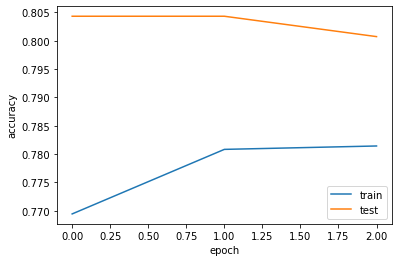

In [91]:
import matplotlib.pyplot as p
p.plot(h.history['accuracy'])
p.plot(h.history['val_accuracy'])
p.ylabel('accuracy')
p.xlabel('epoch')
p.legend(['train','test'])
p.show()

## 6. Conclusion and Interpretation

due to data imbalance model is trying to predict most of the data points to belong to the majority class to get the highest accuracy

## 7. Food for thought:

1.) Change activation function (try leaky_relu or tanh) and see if it helps in improving model performance with the dataset that is highly imbalanced

2.) Try with only the overall review feature and see if it leads to improvement in model performace

3.) Change the hyperparameters of the model and compare the results 

In [ ]:
m=Sequential([Embedding(len(t.word_index)+1,50,weights=[em],input_length=maxlen,trainable=False),LSTM(128,return_sequences=True),LSTM(128),Dense(512,activation='tanh'),Dense(5,activation='softmax')])
